In [1]:
%pip install nltk
%pip install scikit-learn
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
#I added this because of a lookup error for nltk
#nltk.download()
import sklearn
import matplotlib.pyplot as plt
import csv

In [3]:
#get the data from the kaggledata_archive for n-grams (using all-data.csv)
import re
#Changed it from a panda dataframe into a csv file which then returns as a list of string
regex = re.compile(r'[^\w\s]*') #regular expression to get rid of punctuation marks
with open('./kaggledata_archive/all-data.csv', encoding='latin-1') as original_csv: 
    financial_csv = csv.reader(original_csv)
    finance = list(financial_csv)

#get rid of the first column(sentiment) in csv        
csv_data: list[str] = [t[1] for t in finance]
csv_data: list[str] = [re.sub(r'[^\w\s]*', '', _) for _ in csv_data] #using regular expression to replace punctuations with white space



In [4]:
#Task 1: N-gram Generation
from nltk.tokenize import word_tokenize
from collections import Counter

#Task 1: N-gram Generation
def n_gram_generation(csv_data: list[str], number_of_words: int) -> tuple[tuple[str]]:
    """A function that extracts a certain words from the csv file 
        into a list of tuple of strings

    Args:
        csv_file (pandas dataframe): a dataframe of a csv file containing all the financial headlines
        number_of_words (integer): the number of words to put in each tuple element 

    Returns:
        n_grams: a list of a tuple of all the words from the csv_file for each n-gram model
    """
    #for text in csv_file: Only iterating through the first row for some reason
        #tokens = word_tokenize(text)

    tokens: list[str] = []
    for line in csv_data:
        tokens.extend(word_tokenize(line))
    ngrams = tuple(tuple(tokens[i : i + number_of_words]) for i in range(len(tokens) - number_of_words + 1))
    return ngrams
    
unigram: tuple[tuple[str]] = n_gram_generation(csv_data, 1)
bigram: tuple[tuple[str]] = n_gram_generation(csv_data, 2)
trigram: tuple[tuple[str]] = n_gram_generation(csv_data, 3)

#Create the word cloud with the top 10 words for each model
unigram_frequency: list[tuple[str]] = Counter(unigram).most_common(10)
#print(unigram_frequency)
#Rewrite this for word cloud visualization
bigram_frequency: list[tuple[str]] = Counter(bigram).most_common(10)
#print(bigram_frequency)
trigram_frequency: list[tuple[str]] = Counter(trigram).most_common(10)
#print(trigram_frequency)


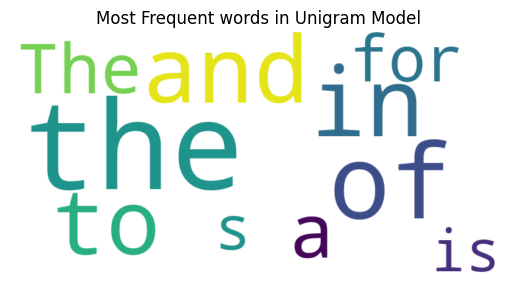

In [5]:
#Display the word cloud for unigram model
from wordcloud import WordCloud
#convert unigram_frequency into a dictionary
unigram_dict_frequency = {k[0]: v for k, v in unigram_frequency}
unigram_wordCloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unigram_dict_frequency)
plt.imshow(unigram_wordCloud, interpolation='bilinear')
plt.title("Most Frequent words in Unigram Model")
plt.axis("off")
plt.show()

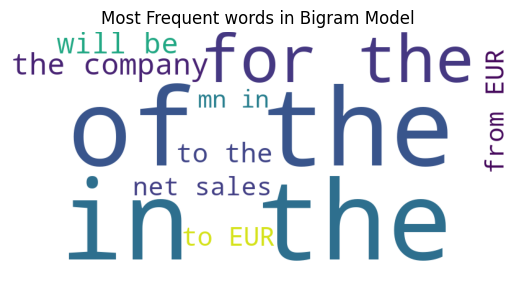

In [6]:
#Display the word cloud for bigram model
from wordcloud import WordCloud
#Convert from lis[tuple[str]] to dictionary to make it easier for wordcloud
bigram_dict_frequency = {' '.join(bigram): count for bigram, count in bigram_frequency}
bigram_wordCloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict_frequency)
plt.imshow(bigram_wordCloud)
plt.title("Most Frequent words in Bigram Model")
plt.axis("off")
plt.show()

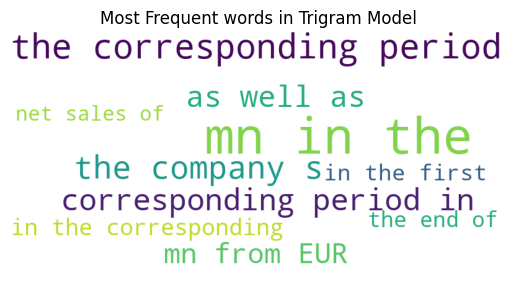

In [7]:
#Display the word cloud for trigram model
from wordcloud import WordCloud
trigram_dict_frequency = {' '.join(trigram): count for trigram, count in trigram_frequency}
trigram_wordCloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_dict_frequency)
plt.imshow(trigram_wordCloud)
plt.title("Most Frequent words in Trigram Model")
plt.axis("off")
plt.show()

In [ ]:
#Task 2: N-Gram Modeling
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import defaultdict
#This is the function to calculate perplexity
def calculate_perplexity(test_text_series: pd.Series, cond_prob: dict) -> float:
    """
    A function that returns the perplexity of each n-gram model
    using text from the test set and the conditional probabilities calculated in n_gram model
    
    Args:
    test_text_series: panda Series that contains a small percentage of financial headlines text not used in n_gram_model
    cond_prob: a dictionary containing the probabilities of the n-grams with the probability of each being 
    
    Returns:
    perplexity: a float representing the perplexity of each model
    """
    perplexity = 0
    return perplexity

def n_gram_model(text_series:pd.Series, n: int) -> dict:
    """
    A function that creates a n-gram model trained on a pandas dataframe/Series
    
    Args:
    text: panda Series that contains the financial headlines text
    n: integer of how many n-grams to create (1 for unigram, 2 for bigram, etc.)
    
    Returns:
    ngram_frequency: a dictionary containing all the n-grams and their frequency (number of times they appear)
    context_frequency: a dictionary of the n-grams and their frequency(number of times they occur)
    conditional_probability: a dictonary containing the probability of the n-grams based on previous word
    """
    ngram_frequency = defaultdict(int) #number of times a n-gram appears in the datset
    context_frequency = defaultdict(int) #number of times each n-1(context) words of n-gram appear (This is for the bigram and trigram)
    conditional_probability = dict()
    
    #Need to go through every line in the series and split it
    tokens = []
    for line in text_series:
        tokens.extend(line.split())
    
    #Add the start and end sentence token like in the textbook
    tokens = ['<s>']  * (n-1) + tokens + ['</s>'] 
    for i in range(len(tokens) - n+1):
        ngram = tuple(tokens[i: i + n])
        context = tuple(tokens[i: i + n-1])
        #increment each time a n-gram appears
        ngram_frequency[ngram] +=1 
        #increment each time a context appears
        context_frequency[context] +=1
    
    #Look at the frequency for all n_gram to compute the conditonal probability    
    for n_gram, frequency in ngram_frequency.items():
        context = n_gram[:-1] #extract the context of each n_gram frequency
        #frequency/context which stores the n-grams with their probability
        conditional_probability = frequency/context_frequency[context]
        
    return dict(ngram_frequency), dict(context_frequency), conditional_probability
#use pandas dataframe to read in csv file now
financial_df = pd.read_csv('./kaggledata_archive/all-data.csv', encoding='latin-1', header=None)
#drop the sentiment column
financial_df = financial_df.drop(financial_df.columns[0], axis=1)

#Do regular expressions to get rid of punctuations and lower case
financial_df = financial_df[1].str.lower()

pattern = re.compile(r'[^\w\s]*') #regular expression to get rid of punctuation marks

financial_df = financial_df.replace(pattern,'',regex=True)

# print(financial_df.head()) to see if above statements came out the way I wanted

#Split the dataframe into training set and test set (test_size =0.2)
training_set,test_set = train_test_split(financial_df, test_size=0.2, random_state=42)
#print(training_set.shape)
#print(test_set.shape)

#get just the text from the training_set and test_set
training_text = training_set.astype(str)
test_text = test_set.astype(str)

#Train the n-gram models
unigram_model, unigram_context, unigram_cond_prob= n_gram_model(training_text, 1)
bigram_model, bigram_context, bigram_cond_prob = n_gram_model(training_text, 2)
trigram_model, trigram_context, trigram_cond_prob= n_gram_model(training_text, 3)

#Printing the perplexity of each n-gram model
print(calculate_perplexity())
print(calculate_perplexity(bigram_model))
print(calculate_perplexity(trigram_model))

TypeError: calculate_perplexity() takes 0 positional arguments but 1 was given

In [ ]:
#Task 3: Handling unseen n-grams

def laplace_smoothing():
    return

#Plotting the laplace smoothing of the n-gram models

In [ ]:
#Task 4: Interpolation
def interpolation():
    return

#Plotting the interpolated models vs the laplace smoothed models